# Proyecto I 
* Monica Alfaro Parrales
* Adrián Ramírez Mattey
* Gilberth Rodríguez Mejías 

## Carga del dataset "Pima Indians Diabetes Database"

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [ ]:
data = pd.read_csv('diabetes.csv')
print("data head")
display(data.head())
print("data describe")
display(data.describe())
display(data)

X = data[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]].values

y = data['Outcome']

## Análisis de datos
1 = Diabetes

0 = No diabetes

### Gráficos de dispersión 

In [ ]:
sns.scatterplot(x='Pregnancies', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Embarazos")
plt.xlabel("Embarazos")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Glucosa")
plt.xlabel("Glucosa")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='BloodPressure', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Presión Arterial")
plt.xlabel("Presión arterial")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='SkinThickness', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Grosor de la piel")
plt.xlabel("Grosor de la piel")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='Insulin', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Insulina")
plt.xlabel("Insulina")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de BMI")
plt.xlabel("BMI")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='DiabetesPedigreeFunction', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Diabetes Pedigree")
plt.xlabel("Diabetes Pedigree")
plt.ylabel("Edad")
plt.show()


### Histogramas

In [ ]:
dataGroup = data.groupby('Outcome')
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Pregnancies'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Pregnancies'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Embarazos')
plt.xlabel('Embarazos')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Glucose'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Glucose'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Insulin'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Insulin'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Insulina')
plt.xlabel('Insulina')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['BMI'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['BMI'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - BMI')
plt.xlabel('BMI')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['DiabetesPedigreeFunction'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['DiabetesPedigreeFunction'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Age'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Age'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Edad')
plt.xlabel('Edad')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

## Eliminación de outliers y división del dataset
Se procede a hacer uso de IQR, el rango intercuartil (IQR) es la diferencia entre el percentil 75 y el 25 de los datos. Es una medida de dispersión similar a la desviación estándar o la varianza, pero es mucho más robusta frente a valores atípicos. Posteriormente, se hace un shuffle de la data para asegurar una mayor distribución y se divide el dataset en un 80% training y 20% testing. 

In [ ]:
# Calcula el IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identifica los outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Encuentra las filas que tienen al menos un outlier
outliers_indices = outliers.any(axis=1)

# Muestra las filas con outliers
print("Filas con outliers:")
display(data[outliers_indices])

# Elimina los outliers
data_sin_outliers = data[~outliers_indices]

# Muestra el conjunto de datos sin outliers
print("Data sin outliers:")
display(data_sin_outliers)

### Gráficos de dispersión posterior a eliminación de outliers

In [ ]:
sns.scatterplot(x='Pregnancies', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Embarazos (no outliers)")
plt.xlabel("Embarazos")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=data_sin_outliers )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Glucosa (no outliers)")
plt.xlabel("Glucosa")
plt.ylabel("Edad")
plt.show()


In [ ]:
sns.scatterplot(x='BloodPressure', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Presión Arterial (no outliers)")
plt.xlabel("Presión arterial")
plt.ylabel("Edad")
plt.show()


In [ ]:
sns.scatterplot(x='SkinThickness', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Grosor de la piel (no outliers)")
plt.xlabel("Grosor de la piel")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='Insulin', y='Age', hue='Outcome', data=data_sin_outliers )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Insulina (no outliers)")
plt.xlabel("Insulina")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=data_sin_outliers)

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de BMI (no outliers)")
plt.xlabel("BMI")
plt.ylabel("Edad")
plt.show()

In [ ]:
sns.scatterplot(x='DiabetesPedigreeFunction', y='Age', hue='Outcome', data=data_sin_outliers, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Diabetes Pedigree (no outliers)")
plt.xlabel("Diabetes Pedigree")
plt.ylabel("Edad")
plt.show()

### División del dataset

In [ ]:
# Antes de dividir los datos, barajamos el dataset de forma aleatoria para mayor diversidad de datos
dataset_shuffled = shuffle(data_sin_outliers, random_state=20)  # random_state para reproducibilidad
# random_state = 50 malos resultados en el modelo || random_state = 20 buenos resultados en el modelo

# Dividir los datos en conjunto de entrenamiento y prueba
p_train = 0.8  # Porcentaje de training set
train_index = int(len(dataset_shuffled) * p_train)

dataFrameTraining = dataset_shuffled[:train_index]

dataFrameTesting = dataset_shuffled[train_index:]

print("Ejemplos usados para entrenar: ", len(dataFrameTraining))
print("Ejemplos usados para test: ", len(dataFrameTesting))

In [27]:
def printAccGraph(lst):
    acc = []
    for i in range(0, len(lst)):
        acc.append(lst[i]['acc'])
    plt.plot(acc)
    plt.title('Accuracy')
    plt.xlabel('Iteraciones')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

def printPrecGraph(lst):
    prec = []
    for i in range(0, len(lst)):
        prec.append(lst[i]['prec'])
    plt.plot(prec)
    plt.title('Precision')
    plt.xlabel('Iteraciones')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.show()

def printRecGraph(lst):
    rec = []
    for i in range(0, len(lst)):
        rec.append(lst[i]['rec'])
    plt.plot(rec)
    plt.title('Recall')
    plt.xlabel('Iteraciones')
    plt.ylabel('Recall')
    plt.grid(True)
    plt.show()

def printF1Graph(lst):
    f1 = []
    for i in range(0, len(lst)):
        f1.append(lst[i]['f1'])
    plt.plot(f1)
    plt.title('F1')
    plt.xlabel('Iteraciones')
    plt.ylabel('F1')
    plt.grid(True)
    plt.show()

def printAucGraph(lst):
    auc = []
    for i in range(0, len(lst)):
        auc.append(lst[i]['auc'])
    plt.plot(auc)
    plt.title('AUC')
    plt.xlabel('Iteraciones')
    plt.ylabel('AUC')
    plt.grid(True)
    plt.show()

## KNN y metricas del KNN

In [ ]:
x_train = dataFrameTraining[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]].values

y_train = dataFrameTraining['Outcome']

x_test = dataFrameTesting[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]].values

y_test = dataFrameTesting['Outcome']

lst = []

for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lst.append({"k": i, "acc": acc, "prec": prec, "rec": rec, "f1": f1, "auc": auc, "roc": roc})


maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print(f"k = {maxAuc['k']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print(f"k = {maxPrec['k']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print(f"k = {maxRec['k']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print(f"k = {maxF1['k']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print(f"k = {maxAcc['k']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)


#plt.plot(roc[0], roc[1], label=f"K = {i}")
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.title("ROC Curve")
#plt.grid(True)
#plt.legend()
#plt.show()

## Regresión Logísticas y métricas

In [29]:
# Preparar los datasets de entrenamiento y prueba

x_train = dataFrameTraining.drop('Outcome', axis=1)
y_train = dataFrameTraining['Outcome']
#print('Datos entrenamiento:')
#display(x_train.head(), y_train.head())

x_test = dataFrameTesting.drop('Outcome', axis=1)
y_test = dataFrameTesting['Outcome']
#print('Datos prueba:')
#display(x_test.head(), y_test.head())

# hiper parámetros:
# C: Inverso de la fuerza de regulación,
# max_iter: cantidad máxima de iteraciones para convergencia del solver,
# penalty: la norma de penalidad del algoritmo
# solver: tipo de algoritmo para la optimización del problema (tiene que ir de la mano con el tipo de penalizador)

lr_c = 100
lr_max_iter = 200

lr_model = LogisticRegression(C=lr_c, max_iter=lr_max_iter, )
lr_model.fit(x_train, y_train)

# Predicción y evaluación
lr_pred = lr_model.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_prec = precision_score(y_test, lr_pred)
lr_rec = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_roc = roc_curve(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred)

lr_performance = {'c': lr_c, 'max_iter': lr_max_iter, 'acc': lr_acc, 'prec': lr_prec, 'rec': lr_rec, 'f1': lr_f1, 'auc': lr_auc, 'roc': lr_roc}

display(lr_performance)



{'c': 100,
 'max_iter': 200,
 'acc': 0.8125,
 'prec': 0.7241379310344828,
 'rec': 0.5675675675675675,
 'f1': 0.6363636363636364,
 'auc': 0.7398277398277397,
 'roc': (array([0.        , 0.08791209, 1.        ]),
  array([0.        , 0.56756757, 1.        ]),
  array([inf,  1.,  0.]))}

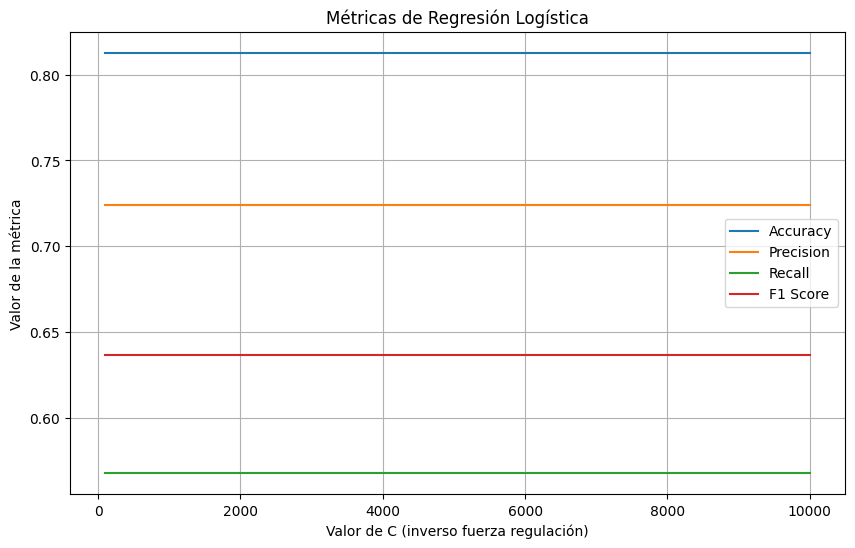

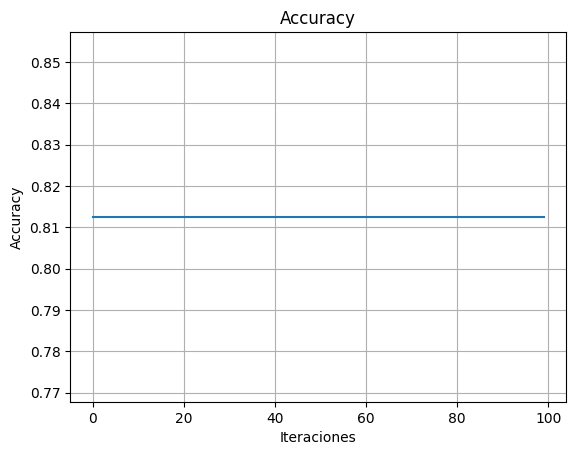

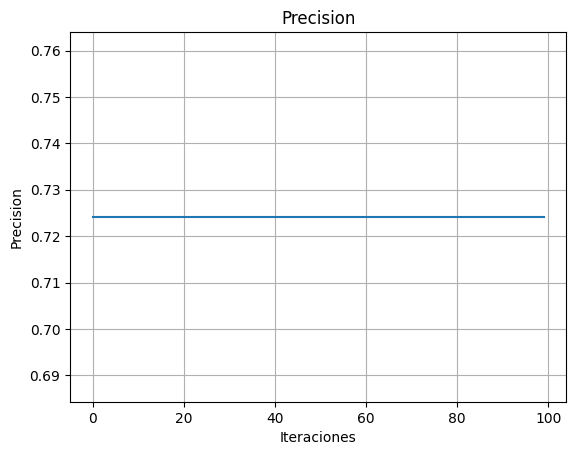

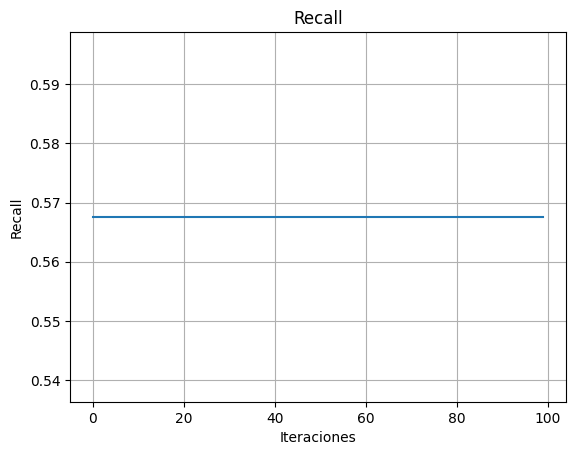

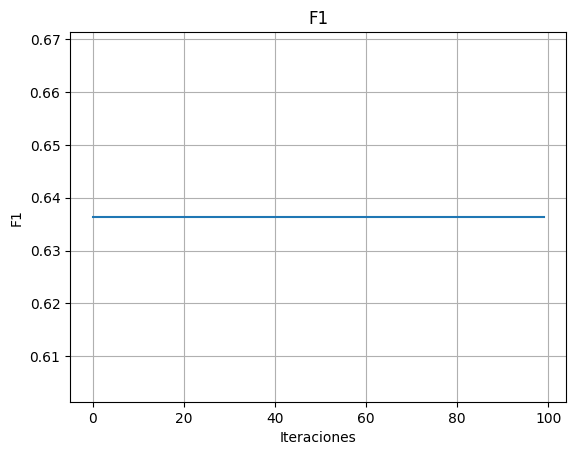

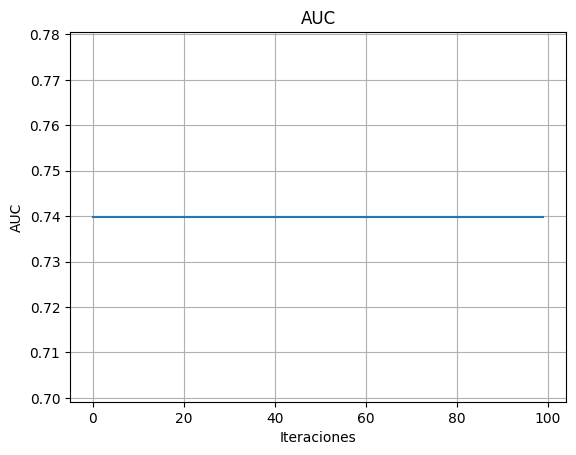

In [38]:
# Cambiar periódicamente el valor C para ver si afecta el desempeño

log_list = []

acc_list = []
prec_list = []
rec_list = []
f1_list = []
roc_list = []
auc_list = []

c_range = list(range(100,10100, 100))

for c_val in c_range:
    log_reg = LogisticRegression(C=c_val, max_iter=lr_max_iter, )
    log_reg.fit(x_train, y_train)
    log_pred = log_reg.predict(x_test)
    
    log_acc = accuracy_score(y_test, log_pred)
    log_prec = precision_score(y_test, log_pred)
    log_rec = recall_score(y_test, log_pred)
    log_f1 = f1_score(y_test, log_pred)
    
    log_roc = roc_curve(y_test, log_pred)
    log_auc = roc_auc_score(y_test, log_pred)
    
    log_performance = {'c': c_val, 'max_iter': lr_max_iter, 'acc': log_acc, 'prec': log_prec, 'rec': log_rec, 'f1': log_f1, 'auc': log_auc, 'roc': log_roc}
    
    log_list.append(log_performance)
    acc_list.append(log_acc)
    prec_list.append(log_prec)
    rec_list.append(log_rec)
    f1_list.append(log_f1)
    roc_list.append(log_roc)
    auc_list.append(log_auc)


fig, ax = plt.subplots(figsize=(10,6))
ax.plot(c_range, acc_list, label='Accuracy', )
ax.plot(c_range, prec_list, label='Precision', )
ax.plot(c_range, rec_list, label='Recall', )
ax.plot(c_range, f1_list, label='F1 Score', )
ax.set_title('Métricas de Regresión Logística')
ax.set_xlabel('Valor de C (inverso fuerza regulación)')
ax.set_ylabel('Valor de la métrica')
plt.grid()
plt.legend()
plt.show()


printAccGraph(log_list)
printPrecGraph(log_list)
printRecGraph(log_list)
printF1Graph(log_list)
printAucGraph(log_list)



# Carga del dataset "The Spotify Hit Predictor Dataset (1960-2019)" específico del 2010 al 2019

In [ ]:
data_2 = pd.read_csv('dataset-of-10s.csv') #renombre de forma temporal, por favor cambiemos el nombre de estos datasets x'd
print("data head")
display(data_2.head())
print("data info")
display(data_2.describe())